# Dataset Showcase: MNIST

In this notebook, we'll explore the MNIST dataset - one of the most famous datasets in machine learning. MNIST contains handwritten digits (0-9) and is commonly used as a benchmark for image classification tasks.

**What you'll learn:**
- How to load MNIST using PyTorch
- Basic dataset statistics and structure
- How to visualize individual samples
- How to explore the dataset interactively

**What you'll practice:**
- Training your first MLP model
- Training a model on multi-class data

## Setup and Imports

In [2]:
import torch
from torchvision import datasets, transforms
import matplotlib.pyplot as plt
import numpy as np
import random

# Set random seeds for reproducibility
torch.manual_seed(42)
np.random.seed(42)
random.seed(42)

## Loading the MNIST Dataset

We'll load both the training and test sets. PyTorch's `torchvision` library makes this easy - it will automatically download the dataset the first time you run this.

In [3]:
# Define a simple transform to convert images to tensors
transform = transforms.Compose([
    transforms.ToTensor(),  # Converts PIL Image to tensor and scales to [0, 1]
])

# Load training data
train_dataset = datasets.MNIST(
    root='./data',
    train=True,
    download=True,
    transform=transform
)

# Load test data
test_dataset = datasets.MNIST(
    root='./data',
    train=False,
    download=True,
    transform=transform
)

print("MNIST dataset loaded successfully!")

100%|██████████| 9.91M/9.91M [00:00<00:00, 34.7MB/s]
100%|██████████| 28.9k/28.9k [00:00<00:00, 969kB/s]
100%|██████████| 1.65M/1.65M [00:00<00:00, 8.82MB/s]
100%|██████████| 4.54k/4.54k [00:00<00:00, 7.49MB/s]

MNIST dataset loaded successfully!


## Exploratory Data Analysis (EDA)

Let's explore the basic structure and statistics of the MNIST dataset.

### Dataset Size and Structure

In [4]:
# Basic dataset information
print(f"Training samples: {len(train_dataset)}")
print(f"Test samples: {len(test_dataset)}")
print(f"Total samples: {len(train_dataset) + len(test_dataset)}")

# Get a sample to inspect dimensions
sample_image, sample_label = train_dataset[0]
print(f"\nImage shape: {sample_image.shape}")  # (channels, height, width)
print(f"Image dimensions: {sample_image.shape[1]}x{sample_image.shape[2]} pixels")
print(f"Number of channels: {sample_image.shape[0]} (grayscale)")
print(f"Label type: {type(sample_label)}")
print(f"Label value: {sample_label}")

Training samples: 60000
Test samples: 10000
Total samples: 70000

Image shape: torch.Size([1, 28, 28])
Image dimensions: 28x28 pixels
Number of channels: 1 (grayscale)
Label type: <class 'int'>
Label value: 5


### Class Distribution

Let's check if the dataset is balanced - do we have roughly equal numbers of each digit?

In [5]:
# Count occurrences of each class in training set
train_labels = [label for _, label in train_dataset]
unique, counts = np.unique(train_labels, return_counts=True)

print("Training set class distribution:")
for digit, count in zip(unique, counts):
    print(f"  Digit {digit}: {count} samples ({count/len(train_dataset)*100:.1f}%)")

Training set class distribution:
  Digit 0: 5923 samples (9.9%)
  Digit 1: 6742 samples (11.2%)
  Digit 2: 5958 samples (9.9%)
  Digit 3: 6131 samples (10.2%)
  Digit 4: 5842 samples (9.7%)
  Digit 5: 5421 samples (9.0%)
  Digit 6: 5918 samples (9.9%)
  Digit 7: 6265 samples (10.4%)
  Digit 8: 5851 samples (9.8%)
  Digit 9: 5949 samples (9.9%)


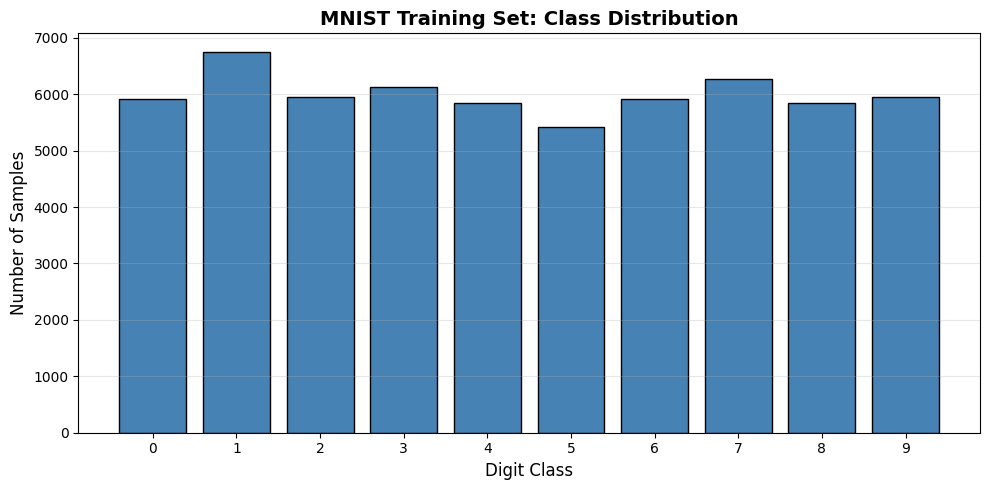


The dataset is fairly balanced across all digit classes!


In [6]:
# Visualize class distribution
plt.figure(figsize=(10, 5))
plt.bar(unique, counts, color='steelblue', edgecolor='black')
plt.xlabel('Digit Class', fontsize=12)
plt.ylabel('Number of Samples', fontsize=12)
plt.title('MNIST Training Set: Class Distribution', fontsize=14, fontweight='bold')
plt.xticks(unique)
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

print("\nThe dataset is fairly balanced across all digit classes!")

### Pixel Value Distribution

Let's look at the range and distribution of pixel values in the images.

In [7]:
# Sample a few images to analyze pixel values
sample_images = [train_dataset[i][0] for i in range(1000)]
sample_images_tensor = torch.stack(sample_images)  # Shape: (1000, 1, 28, 28)

print(f"Pixel value range: [{sample_images_tensor.min():.3f}, {sample_images_tensor.max():.3f}]")
print(f"Mean pixel value: {sample_images_tensor.mean():.3f}")
print(f"Standard deviation: {sample_images_tensor.std():.3f}")

Pixel value range: [0.000, 1.000]
Mean pixel value: 0.128
Standard deviation: 0.305


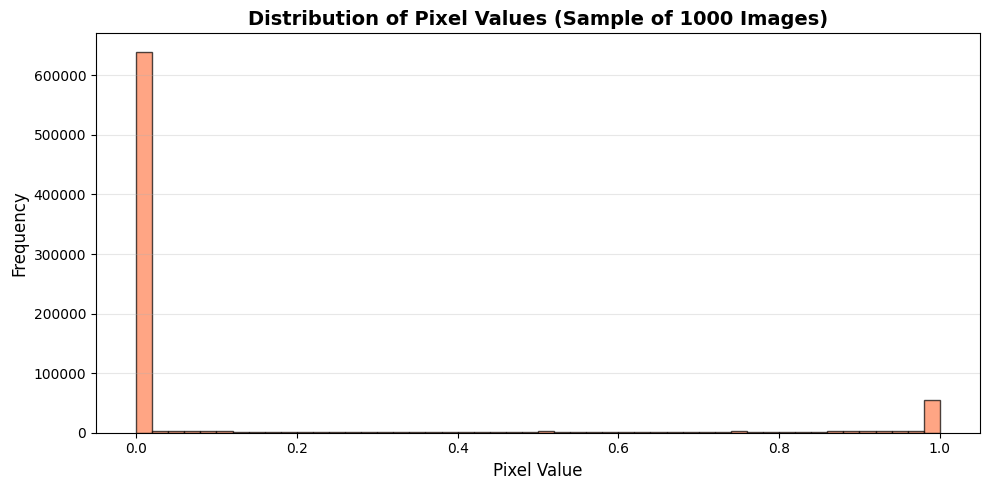


Notice: Most pixels are 0 (black background) or 1 (white foreground).


In [8]:
# Visualize pixel value distribution
plt.figure(figsize=(10, 5))
plt.hist(sample_images_tensor.flatten().numpy(), bins=50, color='coral', edgecolor='black', alpha=0.7)
plt.xlabel('Pixel Value', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.title('Distribution of Pixel Values (Sample of 1000 Images)', fontsize=14, fontweight='bold')
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

print("\nNotice: Most pixels are 0 (black background) or 1 (white foreground).")

## Visualizing Sample Images

Let's look at a grid of sample images to get a feel for what the data looks like.

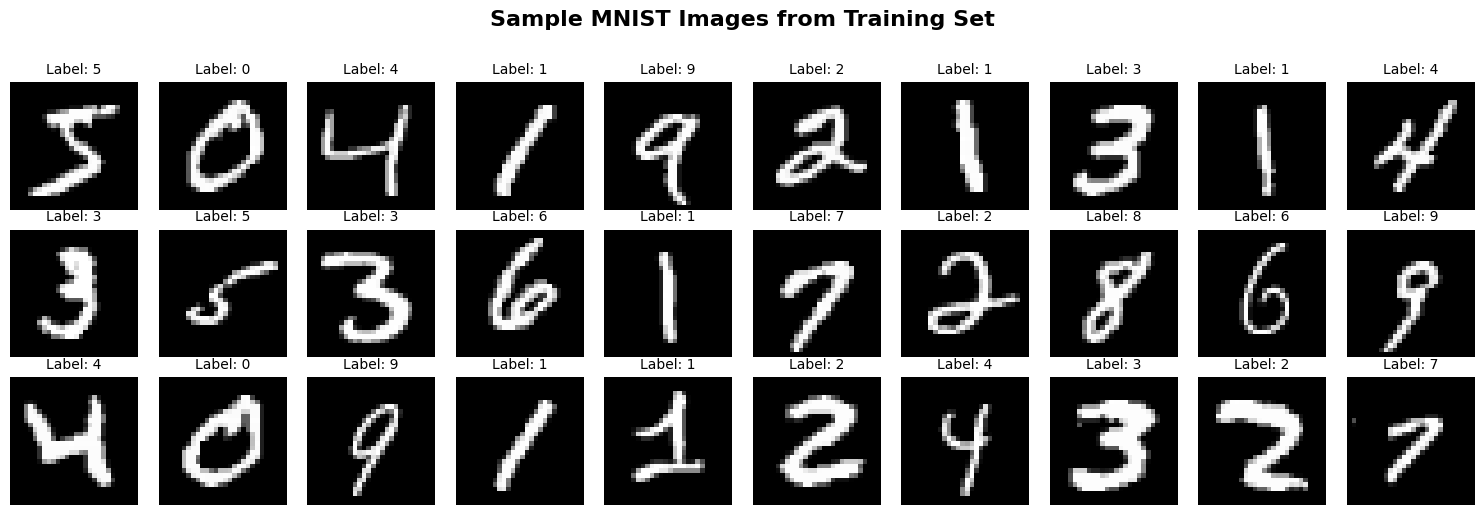

In [9]:
# Display a grid of sample images
fig, axes = plt.subplots(3, 10, figsize=(15, 5))
fig.suptitle('Sample MNIST Images from Training Set', fontsize=16, fontweight='bold', y=1.02)

for idx, ax in enumerate(axes.flat):
    image, label = train_dataset[idx]
    # Convert from (1, 28, 28) to (28, 28) for display
    ax.imshow(image.squeeze(), cmap='gray')
    ax.set_title(f'Label: {label}', fontsize=10)
    ax.axis('off')

plt.tight_layout()
plt.show()

## Interactive Exploration: Random Sample Viewer

Now we'll create a helper function that lets you explore random samples from the dataset. This is useful for understanding the variety and difficulty of the data.

In [10]:
def show_random_sample(dataset, dataset_name="Dataset"):
    """
    Selects and displays a random sample from the dataset.

    Args:
        dataset: PyTorch dataset (e.g., train_dataset or test_dataset)
        dataset_name: Name to display in the title (default: "Dataset")
    """
    # Select a random index
    random_idx = random.randint(0, len(dataset) - 1)

    # Get the image and label
    image, label = dataset[random_idx]

    # Display the image
    plt.figure(figsize=(6, 6))
    plt.imshow(image.squeeze(), cmap='gray')
    plt.title(f'{dataset_name} - Sample #{random_idx}\nLabel: {label}',
              fontsize=14, fontweight='bold')
    plt.axis('off')
    plt.tight_layout()
    plt.show()

    # Print additional information
    print(f"Sample Index: {random_idx}")
    print(f"True Label: {label}")
    print(f"Image Shape: {image.shape}")
    print(f"Pixel Value Range: [{image.min():.3f}, {image.max():.3f}]")

### Try It Out!

Run the cell below multiple times to see different random samples from the training set. Notice the variety in handwriting styles!

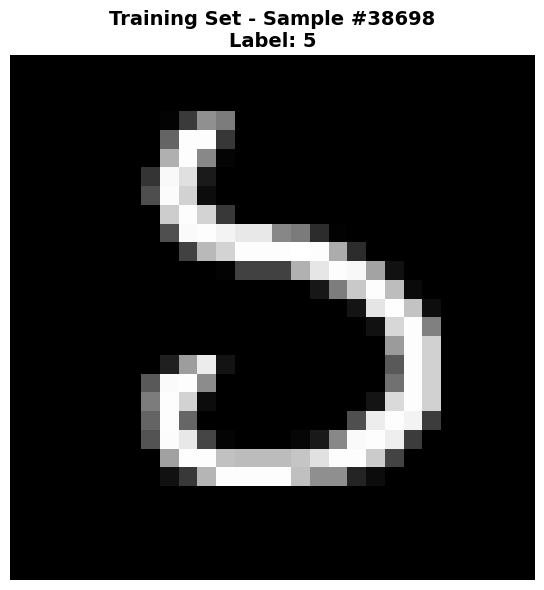

Sample Index: 38698
True Label: 5
Image Shape: torch.Size([1, 28, 28])
Pixel Value Range: [0.000, 1.000]


In [18]:
# Show a random sample from the training set
show_random_sample(train_dataset, dataset_name="Training Set")

## Exploring Specific Digits

Sometimes you might want to see examples of a specific digit. Here's a function for that:

In [12]:
def show_digit_examples(dataset, digit, num_examples=10):
    """
    Display multiple examples of a specific digit.

    Args:
        dataset: PyTorch dataset
        digit: The digit to show (0-9)
        num_examples: Number of examples to display
    """
    # Find indices of the specified digit
    digit_indices = [i for i, (_, label) in enumerate(dataset) if label == digit]

    # Randomly sample indices
    sample_indices = random.sample(digit_indices, min(num_examples, len(digit_indices)))

    # Create subplot grid
    cols = 5
    rows = (len(sample_indices) + cols - 1) // cols
    fig, axes = plt.subplots(rows, cols, figsize=(12, 2.5 * rows))
    fig.suptitle(f'Examples of Digit {digit}', fontsize=16, fontweight='bold')

    # Flatten axes for easier iteration
    if rows == 1:
        axes = axes.reshape(1, -1)

    for idx, ax in enumerate(axes.flat):
        if idx < len(sample_indices):
            image, label = dataset[sample_indices[idx]]
            ax.imshow(image.squeeze(), cmap='gray')
            ax.set_title(f'Index: {sample_indices[idx]}', fontsize=10)
        ax.axis('off')

    plt.tight_layout()
    plt.show()

    print(f"Found {len(digit_indices)} examples of digit {digit} in the dataset.")

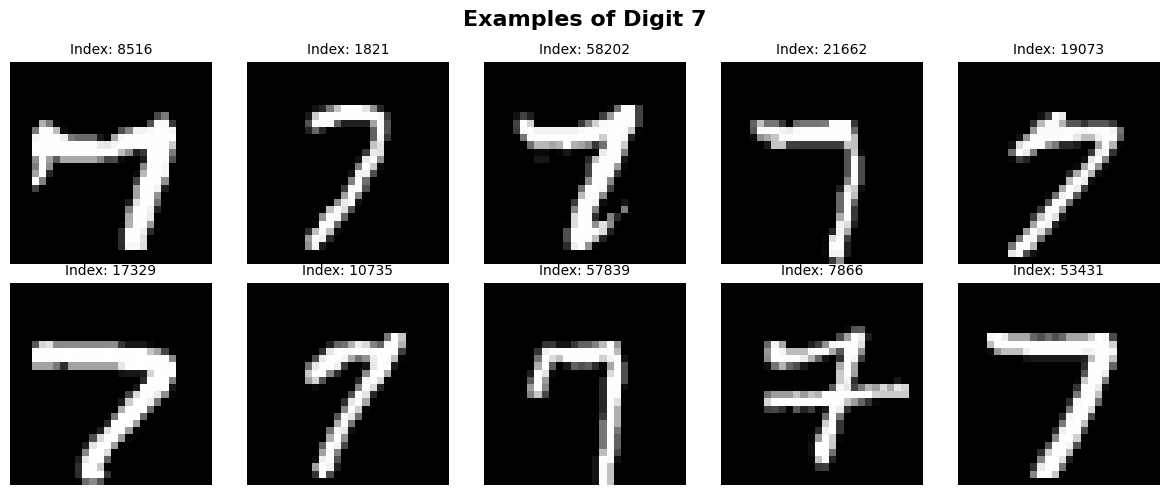

Found 6265 examples of digit 7 in the dataset.


In [13]:
# Show examples of a specific digit (try changing the digit value!)
show_digit_examples(train_dataset, digit=7, num_examples=10)

## Summary

In this notebook, we explored the MNIST dataset and learned:

- **Dataset Structure**: 60,000 training images and 10,000 test images
- **Image Format**: 28x28 pixel grayscale images
- **Classes**: 10 classes (digits 0-9), fairly balanced distribution
- **Pixel Values**: Normalized to [0, 1] range, with most pixels being 0 (background) or near 1 (foreground)

**Key Takeaways**:
- The images show significant variation in handwriting styles, making it a non-trivial classification task

**Next Steps**:
- Try building a simple neural network to classify these digits

# Exercise

> Train a MLP on this dataset. split the data 70/30 and try to obtain at least 95% accuracy on the test set!